# Loan Application Status Prediction

# Step 1: Data Understanding

In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset into a pandas DataFrame
df = pd.read_csv("loan_prediction.csv")
df



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
# Exploring the dataset using functions like head(), info(), describe()
print("Head of the DataFrame:")
print(df.head())

print("\nInfo about the DataFrame:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Head of the DataFrame:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N

**To summarize, the dataset requires preprocessing steps such as handling missing values, encoding categorical variables, and potentially converting some data types for better representation. Further exploration is needed to understand the distribution of variables and relationships between features.**

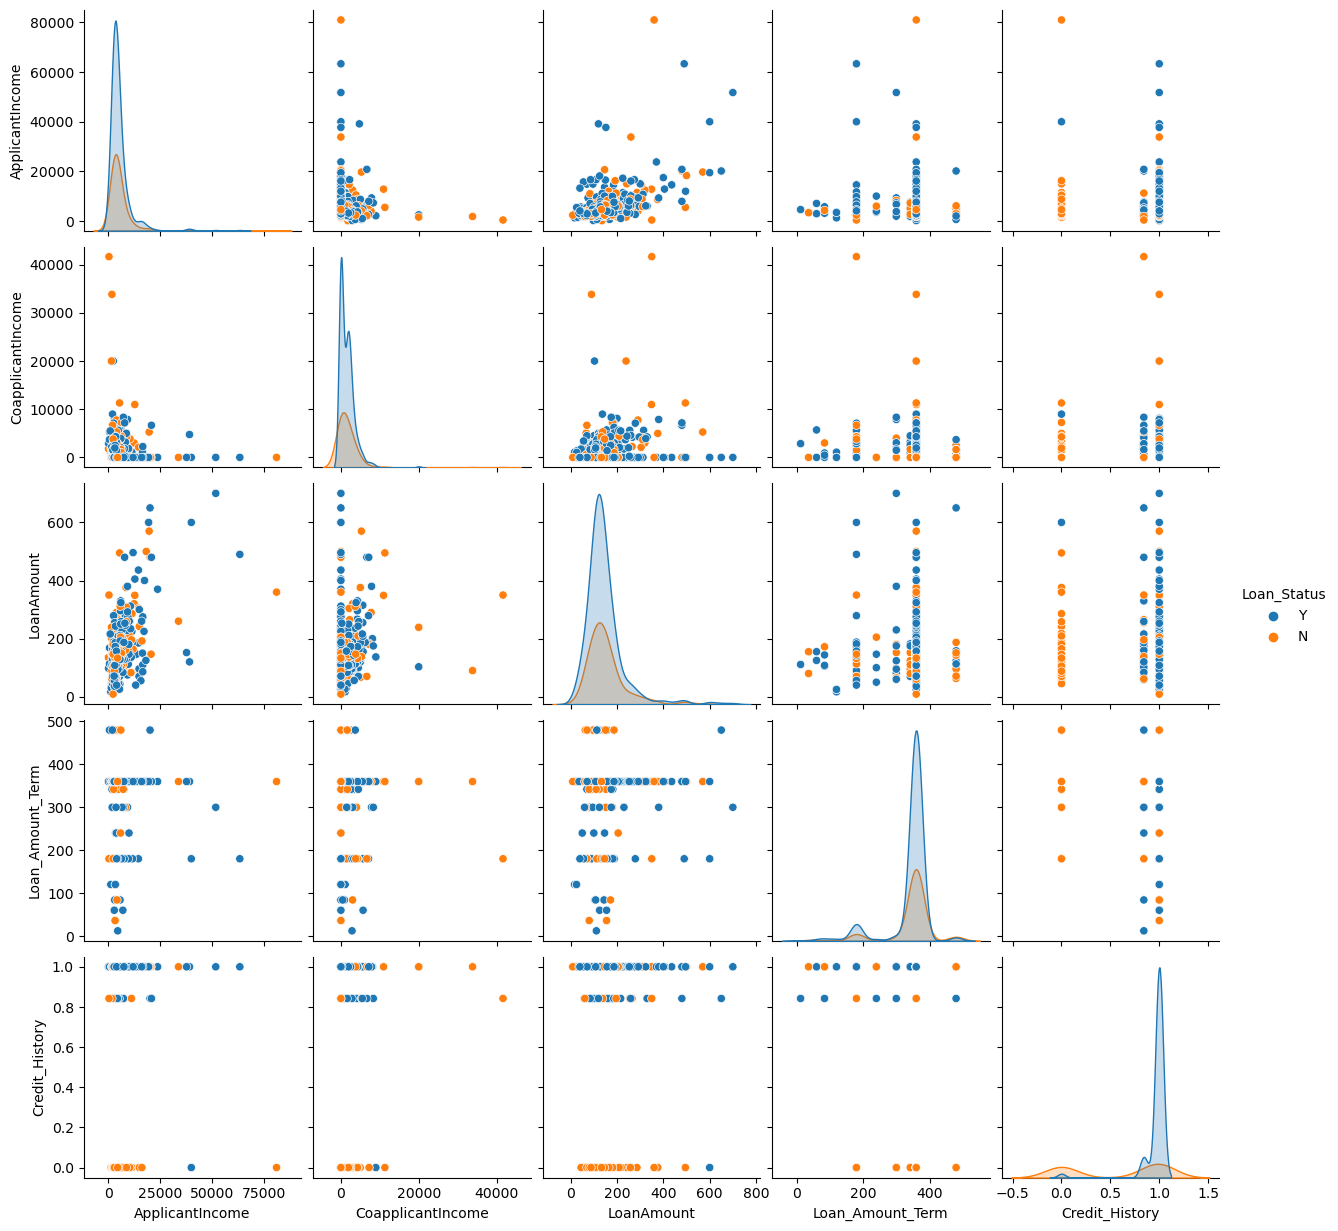

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Step 1: Handling Missing Values
# Use SimpleImputer to fill missing values in numeric columns with the mean
numeric_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

# Fill missing values in categorical columns with the most frequent value
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

# Step 2: Encoding Categorical Variables
# Use OneHotEncoder to convert categorical columns into numerical representations
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']])

# Replace original categorical columns with encoded features
df_encoded = pd.concat([df, pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']))], axis=1)
df_encoded.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1, inplace=True)

# Convert 'Credit_History' to object dtype for better representation
df_encoded['Credit_History'] = df_encoded['Credit_History'].astype('object')

# Step 3: Explore relationships and distributions (additional exploratory analysis)
# Example: Pairplot for numeric variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']], hue='Loan_Status')
plt.show()

# Exploratory Data Analysis (EDA):

<Figure size 1000x600 with 0 Axes>

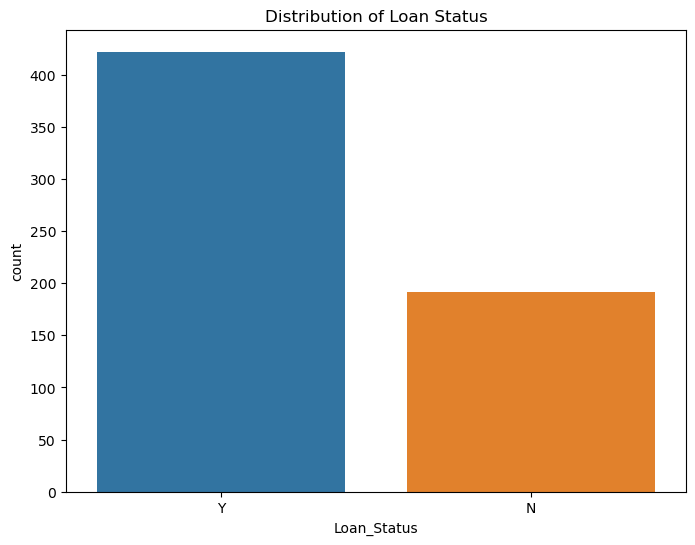

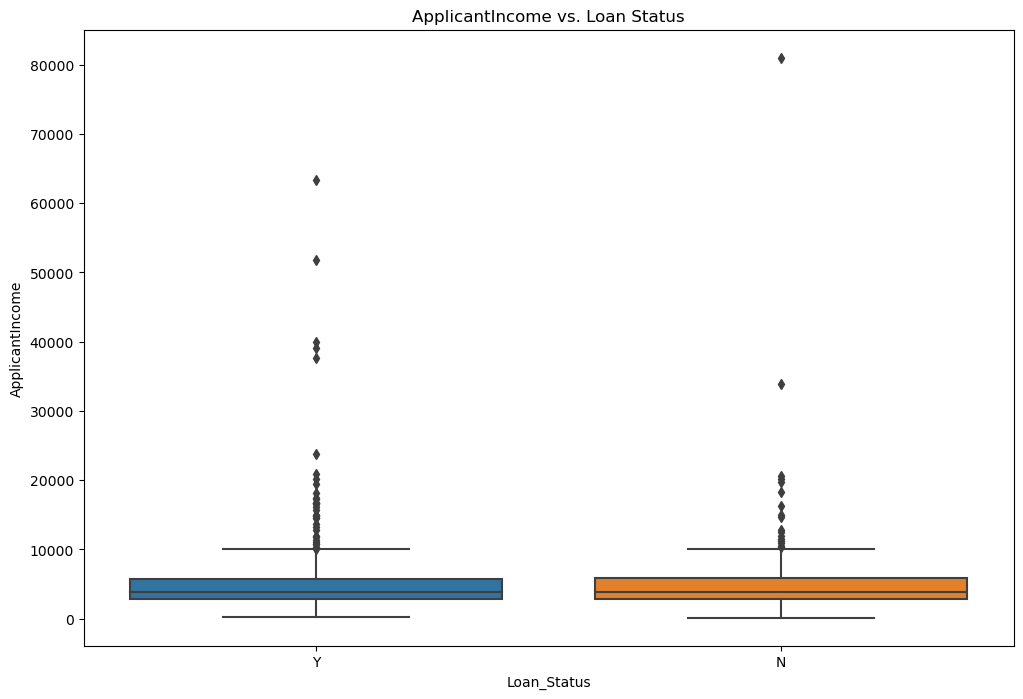

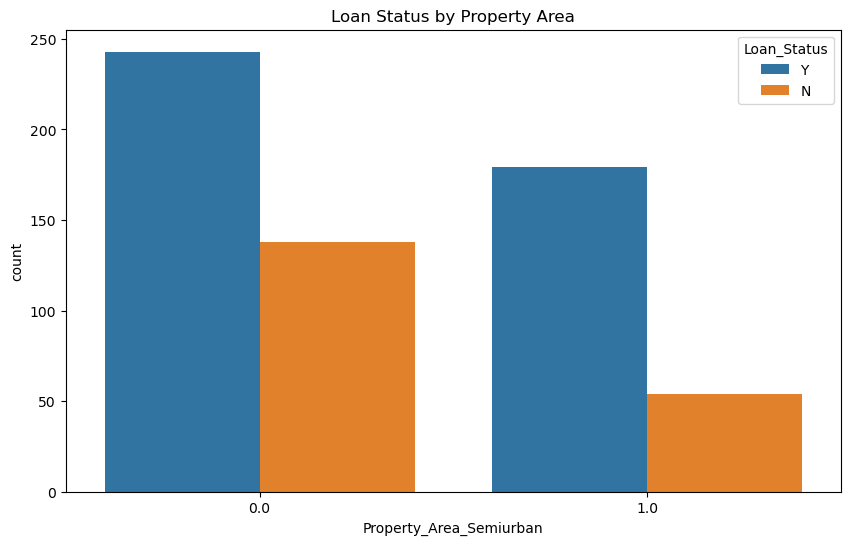

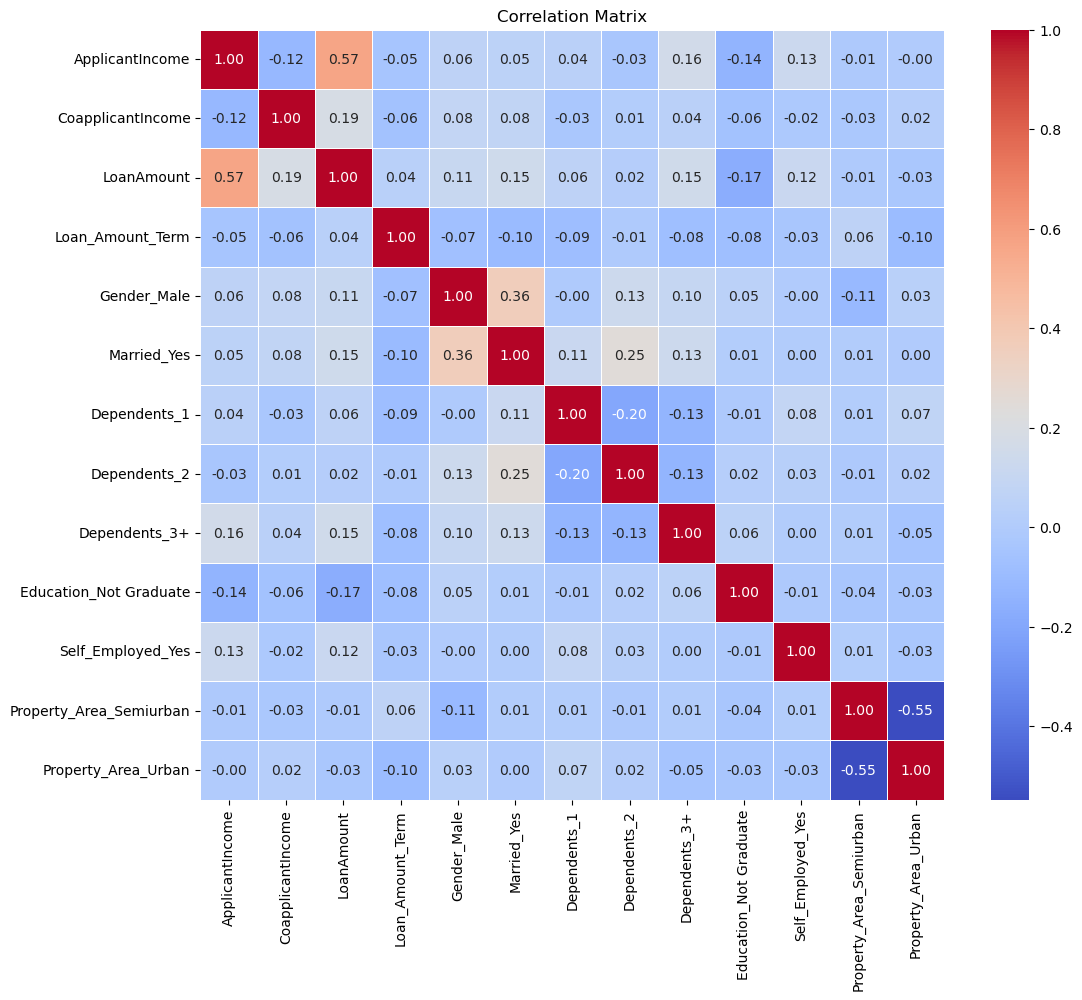

In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of the target variable 'Loan_Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df_encoded)
plt.title('Distribution of Loan Status')
plt.show()

# Visualize relationships between independent variables and the target variable
# Example: Boxplot for ApplicantIncome vs. Loan_Status
plt.figure(figsize=(12, 8))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_encoded)
plt.title('ApplicantIncome vs. Loan Status')
plt.show()

# Retrieve encoded column names
encoded_columns = encoder.get_feature_names_out(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

# Example: Countplot for Property_Area vs. Loan_Status
plt.figure(figsize=(10, 6))
property_area_columns = [col for col in encoded_columns if 'Property_Area' in col]
sns.countplot(x=property_area_columns[0], hue='Loan_Status', data=df_encoded)  # Use the correct encoded column name
plt.title('Loan Status by Property Area')
plt.show()

# Check for correlations between variables
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Feature Engineering

In [7]:

# Create a new feature 'Total_Income' by combining 'ApplicantIncome' and 'CoapplicantIncome'
df_encoded['Total_Income'] = df_encoded['ApplicantIncome'] + df_encoded['CoapplicantIncome']

# Display the first few rows to verify the new feature
print("First few rows with the new 'Total_Income' feature:")
print(df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].head())

# Modify existing features if necessary (example: scaling)
# Note: Scaling may or may not be necessary depending on the algorithm used

# For example, you can scale numeric features like 'ApplicantIncome' and 'Total_Income'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['ApplicantIncome', 'Total_Income']] = scaler.fit_transform(df_encoded[['ApplicantIncome', 'Total_Income']])

# Display the first few rows to verify the scaled features
print("\nFirst few rows with scaled 'ApplicantIncome' and 'Total_Income' features:")
print(df_encoded[['ApplicantIncome', 'Total_Income']].head())


First few rows with the new 'Total_Income' feature:
   ApplicantIncome  CoapplicantIncome  Total_Income
0             5849                0.0        5849.0
1             4583             1508.0        6091.0
2             3000                0.0        3000.0
3             2583             2358.0        4941.0
4             6000                0.0        6000.0

First few rows with scaled 'ApplicantIncome' and 'Total_Income' features:
   ApplicantIncome  Total_Income
0         0.072991     -0.182184
1        -0.134412     -0.144684
2        -0.393747     -0.623656
3        -0.462062     -0.322885
4         0.097728     -0.158785


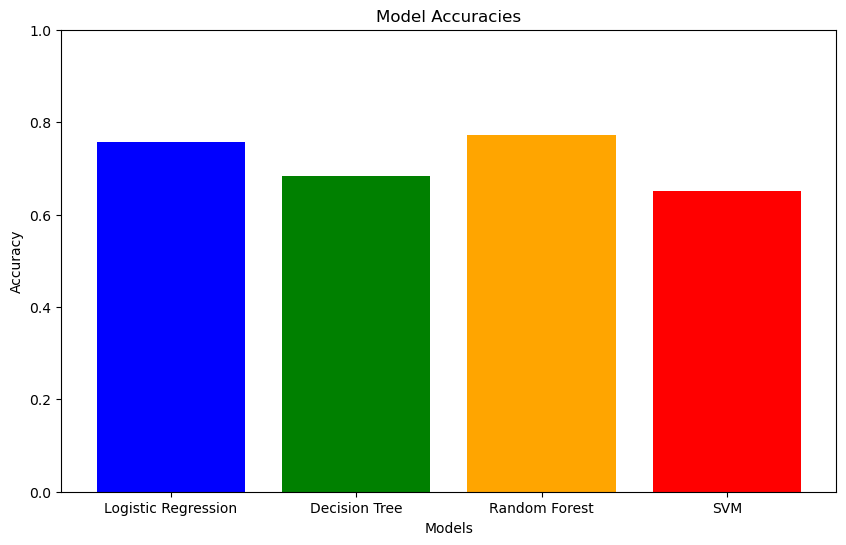

Logistic Regression Accuracy: 75.61%
Decision Tree Accuracy: 68.29%
Random Forest Accuracy: 77.24%
SVM Accuracy: 65.04%


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Drop non-numeric columns like 'Loan_ID'
df_numeric = df.drop(['Loan_ID'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df_numeric[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']])
df_encoded = pd.concat([df_numeric, pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']))], axis=1)
df_encoded.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1, inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Displaying accuracy percentages
for model, acc in zip(models, accuracies):
    print(f'{model} Accuracy: {acc * 100:.2f}%')

**Observations:**

Random Forest performed the best among the models, suggesting that an ensemble approach can be effective for this classification task.
Logistic Regression showed a reasonably good performance, making it a simple yet effective choice for binary classification tasks.
Decision Tree, while capturing complex patterns, may need further optimization to improve its accuracy.
SVM, in this case, had the lowest accuracy, indicating that the model might need more parameter tuning or feature engineering.


# Hyperparameter Tuning for Random Forest:

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print("Best Random Forest Accuracy:", best_rf_accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Accuracy: 0.7886178861788617


# Additional Evaluation Metrics:

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1-score for the best Random Forest model
precision = precision_score(y_test, best_rf_pred, pos_label='Y')
recall = recall_score(y_test, best_rf_pred, pos_label='Y')
f1 = f1_score(y_test, best_rf_pred, pos_label='Y')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7596153846153846
Recall: 0.9875
F1-score: 0.8586956521739131


**Observations:**

The model has a relatively high precision, indicating that when it predicts a loan approval, it is often correct.
The recall is very high, indicating that the model captures the majority of actual loan approvals.
The F1-score, considering both precision and recall, shows a good overall performance of the model.

# Feature Importance

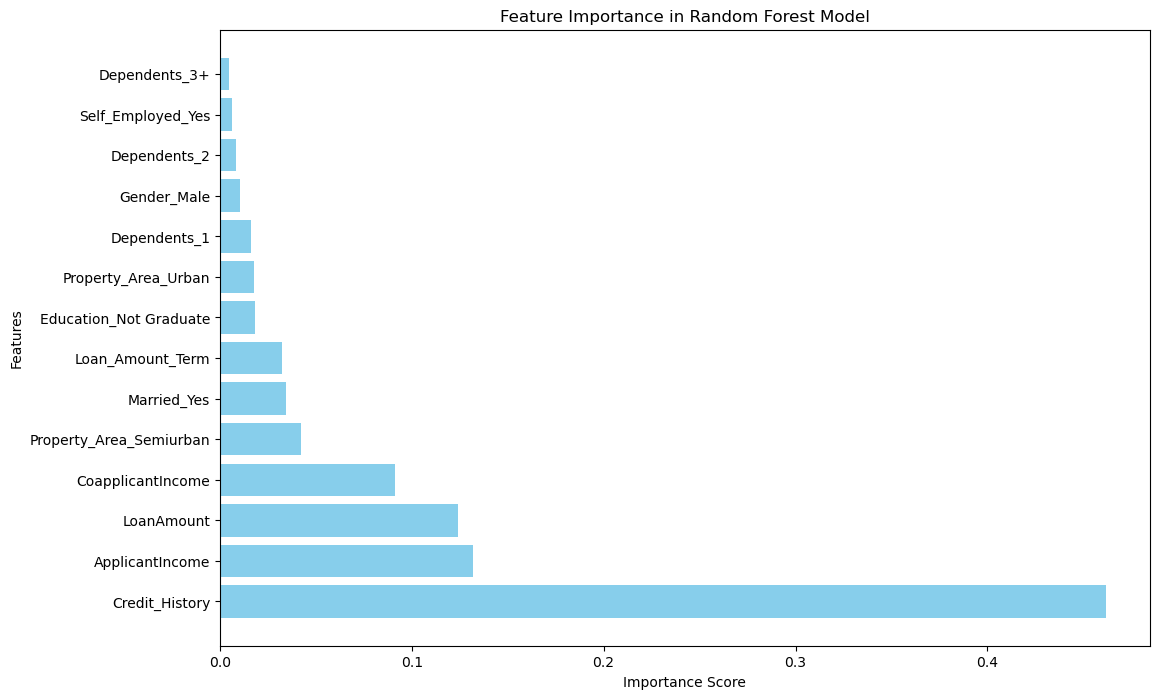

In [17]:
# Getting feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Creating a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [19]:
import joblib
# Saving the model to a file
model_filename = 'loan_approval_model.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as loan_approval_model.joblib
